### Carregamento e exploração dos dados

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [72]:
df_census = pd.read_csv('../data/census.csv')
df_census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,inative-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [73]:
df_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [74]:
df_census.isnull().sum()

age                0
workclass          0
final-weight       0
education          0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loos       0
hour-per-week      0
inative-country    0
income             0
dtype: int64

In [75]:
np.unique(df_census['income'], return_counts = True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

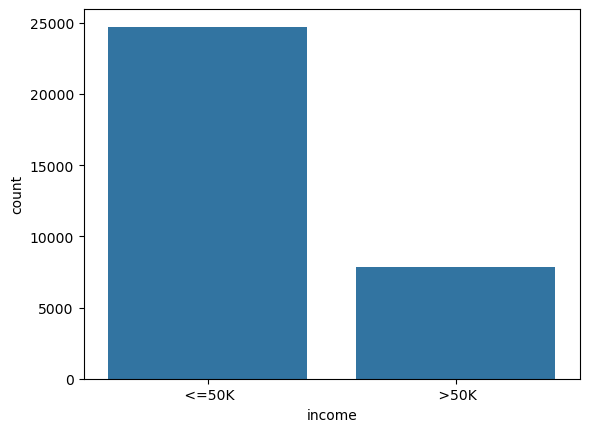

In [76]:
sns.countplot(x = df_census['income']);

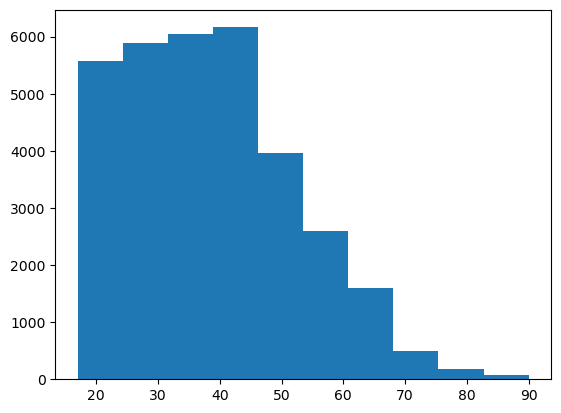

In [77]:
plt.hist(x = df_census['age']);

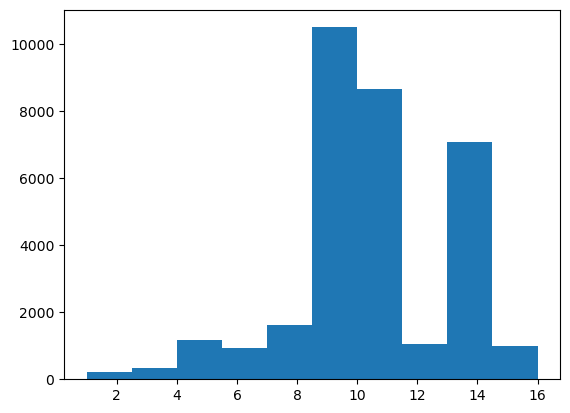

In [78]:
plt.hist(x = df_census['education-num']);

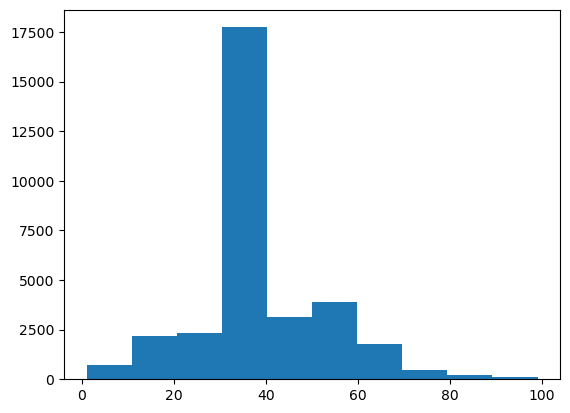

In [79]:
plt.hist(x = df_census['hour-per-week']);

### Tratamento dos dados

In [80]:
df_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'inative-country',
       'income'],
      dtype='object')

In [81]:
#income precisa ficar na primeira posição

In [82]:
df_census.shape

(32561, 15)

In [83]:
columns = []
columns.append('income')

for i in range(len(df_census.columns[:-1])):
    columns.append(df_census.columns[i])

In [84]:
columns

['income',
 'age',
 'workclass',
 'final-weight',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loos',
 'hour-per-week',
 'inative-country']

In [85]:
df_census = df_census[columns]
df_census.head()

,income,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,inative-country
0,<=50K,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,<=50K,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,<=50K,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,<=50K,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,<=50K,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [86]:
df_census.dtypes

income             object
age                 int64
workclass          object
final-weight        int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain        int64
capital-loos        int64
hour-per-week       int64
inative-country    object
dtype: object

### Aplicando One Hot Encoder em variáveis categóricas

In [87]:
df_census = pd.get_dummies(df_census, prefix = ['workclass', 'education', 'marital-status', 'occupation',
                                               'relationship', 'race', 'sex', 'inative-country'],
                              columns = ['workclass', 'education', 'marital-status', 'occupation',
                                                   'relationship', 'race', 'sex', 'inative-country'])

In [88]:
df_census.columns

Index(['income', 'age', 'final-weight', 'education-num', 'capital-gain',
       'capital-loos', 'hour-per-week', 'workclass_ ?',
       'workclass_ Federal-gov', 'workclass_ Local-gov',
       ...
       'inative-country_ Portugal', 'inative-country_ Puerto-Rico',
       'inative-country_ Scotland', 'inative-country_ South',
       'inative-country_ Taiwan', 'inative-country_ Thailand',
       'inative-country_ Trinadad&Tobago', 'inative-country_ United-States',
       'inative-country_ Vietnam', 'inative-country_ Yugoslavia'],
      dtype='object', length=109)

In [89]:
X = df_census.iloc[:, 1:len(df_census)].values #previsores
X = np.array(X).astype('float32')
X

array([[3.90000e+01, 7.75160e+04, 1.30000e+01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [5.00000e+01, 8.33110e+04, 1.30000e+01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.80000e+01, 2.15646e+05, 9.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [5.80000e+01, 1.51910e+05, 9.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.20000e+01, 2.01490e+05, 9.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [5.20000e+01, 2.87927e+05, 9.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00]], dtype=float32)

In [90]:
X.shape, type(X)

((32561, 108), numpy.ndarray)

In [91]:
y = df_census.iloc[:, 0].values
y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [92]:
# <=50k == 0, >50k == 1
y1 = []
for i in y:
    if i == ' >50k':
        y1.append(1.0)
    else:
        y1.append(0.0)

In [93]:
y = np.array(y1).astype('float32')

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [95]:
X_train.shape, X_test.shape

((22792, 108), (9769, 108))

In [96]:
y_train.shape, y_test.shape

((22792,), (9769,))

### Configurações do SageMaker

In [97]:
import sagemaker
import boto3
from sagemaker import Session
import sagemaker.amazon.common as smac
import io
import os

In [98]:
session = sagemaker.Session()
bucket = 'aws-sagemaker-course-633'
subdir = 'models/census/linear-learner'
subdir_dataset = 'datasets/census'
key = 'census-train-data'
role = sagemaker.get_execution_role()
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, subdir_dataset, key)
output_location = 's3://{}/{}/output'.format(bucket, subdir)
print('Localização da base de dados: ', s3_train_data)
print('Modelo final será salvo em: ', output_location)

Localização da base de dados:  s3://aws-sagemaker-course-633/datasets/census/train/census-train-data
Modelo final será salvo em:  s3://aws-sagemaker-course-633/models/census/linear-learner/output


#### convertendo a base de dados numpy para buffer para enviar ao s3 

In [99]:
buffer = io.BytesIO()
smac.write_numpy_to_dense_tensor(buffer, X_train, y_train)
buffer.seek(0)

0

In [100]:
boto3.resource('s3').Bucket(bucket).Object(os.path.join(subdir_dataset, 'train', key)).upload_fileobj(buffer)

### Criação e treinamento do Linear Learner

In [101]:
container = sagemaker.image_uris.retrieve(framework = 'linear-learner', region=boto3.Session().region_name)

INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Defaulting to the only supported framework/algorithm version: 1.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.


In [102]:
linear = sagemaker.estimator.Estimator(image_uri=container,
                                      role=role,
                                      instance_count=1,
                                      instance_type='ml.m5.large',
                                      output_path=output_location,
                                      sagemaker_session=session,
                                      use_stop_instances=True)

In [103]:
linear.set_hyperparameters(feature_dim=108,
                          predictor_type='binary_classifier',
                          num_models=8)

In [104]:
linear.fit({'train': s3_train_data})

INFO:sagemaker:Creating training-job with name: linear-learner-2025-01-09-12-12-13-612


2025-01-09 12:12:13 Starting - Starting the training job...
2025-01-09 12:12:38 Starting - Preparing the instances for training...
2025-01-09 12:13:03 Downloading - Downloading input data...
2025-01-09 12:13:48 Downloading - Downloading the training image........Docker entrypoint called with argument(s): train
Running default environment configuration script
[01/09/2025 12:15:03 INFO 140661355358016] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss': 'auto', 'margin': '1.0', 'quantile': '0.5', 'loss_insensitivity': '0.01', 'huber_delta':

### Deploy, previsões e avaliação

In [105]:
linear_classifier = linear.deploy(initial_instance_count=1, instance_type='ml.m5.large')

INFO:sagemaker:Creating model with name: linear-learner-2025-01-09-12-16-01-235
INFO:sagemaker:Creating endpoint-config with name linear-learner-2025-01-09-12-16-01-235
INFO:sagemaker:Creating endpoint with name linear-learner-2025-01-09-12-16-01-235


-------!

In [106]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer
linear_classifier.serializer = CSVSerializer()
linear_classifier.deserializer = JSONDeserializer()

In [107]:
X_test.shape

(9769, 108)

In [108]:
#confiança - score, predict_label - classe( <=50k, >50k )
results = linear_classifier.predict(X_test)
results

{'predictions': [{'score': 2.7443806175142527e-05, 'predicted_label': 0},
  {'score': 2.281450360896997e-05, 'predicted_label': 0},
  {'score': 2.1947691493551247e-05, 'predicted_label': 0},
  {'score': 3.8758043956477195e-06, 'predicted_label': 0},
  {'score': 8.819190043141134e-06, 'predicted_label': 0},
  {'score': 2.3409173081745394e-05, 'predicted_label': 0},
  {'score': 2.3095977667253464e-05, 'predicted_label': 0},
  {'score': 2.314212360943202e-05, 'predicted_label': 0},
  {'score': 2.805374242598191e-05, 'predicted_label': 0},
  {'score': 2.8285605367273092e-05, 'predicted_label': 0},
  {'score': 2.343345113331452e-05, 'predicted_label': 0},
  {'score': 2.4778893930488266e-05, 'predicted_label': 0},
  {'score': 2.618936741782818e-05, 'predicted_label': 0},
  {'score': 1.5969724699971266e-05, 'predicted_label': 0},
  {'score': 4.105427797185257e-05, 'predicted_label': 0},
  {'score': 1.5329513189499266e-05, 'predicted_label': 0},
  {'score': 2.3359665647149086e-05, 'predicted_l

In [109]:
previsions = np.array([r['predicted_label'] for r in results['predictions']])
previsions

array([0, 0, 0, ..., 0, 0, 0])

In [110]:
y_test

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [111]:
y_test = np.array(y_test).astype(int)

In [112]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [113]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [114]:
accuracy_score(y_test, previsions)

1.0

In [115]:
cm = confusion_matrix(y_test, previsions)
cm

/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


array([[9769]])

In [116]:
print(classification_report(y_test, previsions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9769

    accuracy                           1.00      9769
   macro avg       1.00      1.00      1.00      9769
weighted avg       1.00      1.00      1.00      9769

